
## Case Study PCA
### Solved by: Razan Aljuhani , Alaa Alharbi , Wejdan Alzahrani , Lena Baeshen - Section: BAR

-----------------------------
## Context:
-----------------------------
In this case study, we will use the Education dataset which contains information on educational institutes in USA. The data has various attributes about number of applications received, enrollments, faculty education, financial aspects and graduation rate of each institute. 

-----------------------------
## Objective: 
-----------------------------
The objective of this problem is to reduce the number of features by using dimensionality reduction techniques like PCA and extract insights. 

-----------------------------
## Dataset: 
-----------------------------

The Education dataset contains information on various colleges in USA. It contains the following information:

- Names: Names of various universities and colleges
- Apps: Number of applications received
- Accept: Number of applications accepted
- Enroll: Number of new students enrolled
- Top10perc: Percentage of new students from top 10% of Higher Secondary class
- Top25perc: Percentage of new students from top 25% of Higher Secondary class
- F_Undergrad: Number of full-time undergraduate students
- P_Undergrad: Number of part-time undergraduate students
- Outstate: Number of students for whom the particular college or university is out-of-state tuition
- Room_Board: Cost of room and board
- Books: Estimated book costs for a student
- Personal: Estimated personal spending for a student
- PhD: Percentage of faculties with a Ph.D.
- Terminal: Percentage of faculties with terminal degree
- S_F_Ratio: Student/faculty ratio
- perc_alumni: Percentage of alumni who donate
- Expend: The instructional expenditure per student
- Grad_Rate: Graduation rate

## Importing libraries and overview of the dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#Importing PCA
from sklearn.decomposition import PCA

#### Loading data and print head

In [22]:
data = pd.read_csv('Education_Post_12th_Standard.csv')

In [23]:
data.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Check the info of the data

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F_Undergrad  777 non-null    int64  
 7   P_Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room_Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S_F_Ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad_Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

#### Is there null data?
* No

## Data Preprocessing and Exploratory Data Analysis

#### Check if all the college names are unique

In [25]:
data["Names"].nunique()

777

#### Are all college names unique?
* Yes 
* Will the col be dropped? Yes, because the column 'Names' is object data type and containing unique entries and would not add values to our analysis.

In [26]:
# dropping column Names
data1 = data.copy()
data = data.drop(['Names'], axis=1)
data.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


#### Summary Statistics

In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F_Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P_Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room_Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


#### Check the rows that contain PhD>100 or Grad_Rate>100 

In [28]:
#Check the rows that contain PhD>100 or Grad_Rate > 100
result_PhD = pd.DataFrame(data.PhD > 100)
result_Grad_Rate = pd.DataFrame(data.Grad_Rate > 100)
data[(result_PhD['PhD'] == True) | (result_Grad_Rate['Grad_Rate'] == True)]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118
582,529,481,243,22,47,1206,134,4860,3122,600,650,103,88,17.4,16,6415,43


#### Replace these 2 cpecific cells with 100 in the wrong value.

In [29]:
data.loc[95,'Grad_Rate'] = 100
data.loc[582,'PhD'] = 100
data.loc[[95,582]]

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
95,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,100
582,529,481,243,22,47,1206,134,4860,3122,600,650,100,88,17.4,16,6415,43


#### Let's check the distribution and outliers for each column in the data

Apps
Skew : 3.72


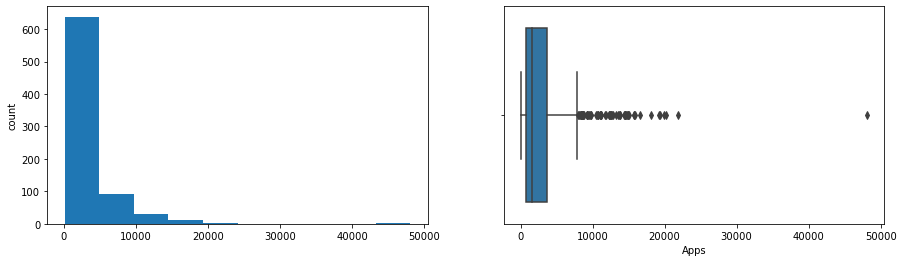

Accept
Skew : 3.42


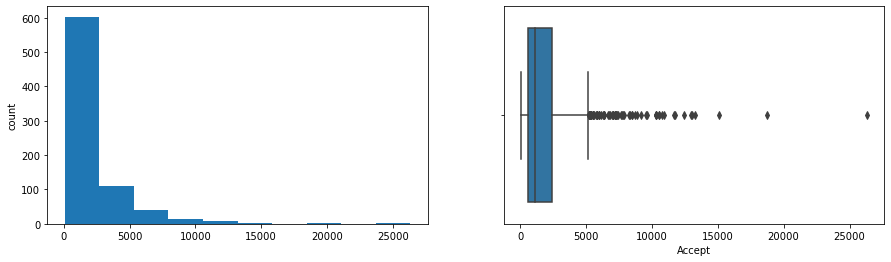

Enroll
Skew : 2.69


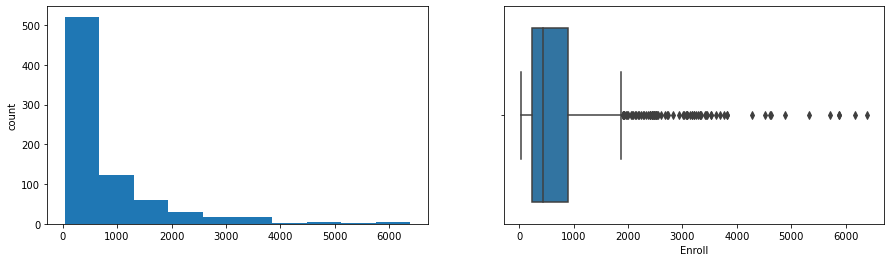

Top10perc
Skew : 1.41


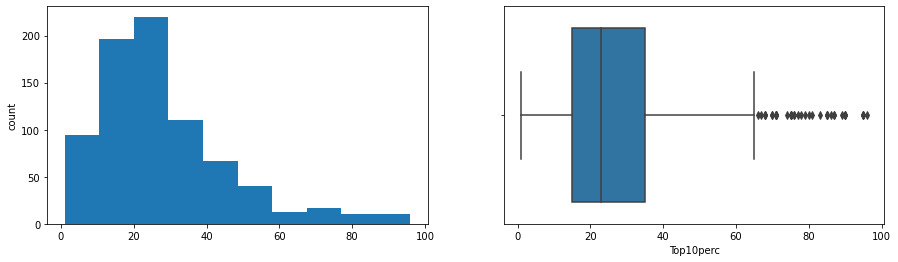

Top25perc
Skew : 0.26


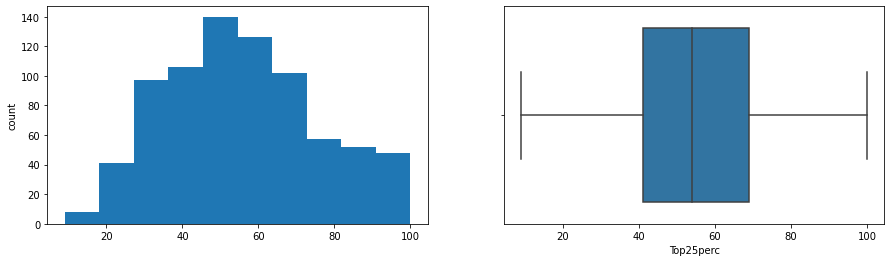

F_Undergrad
Skew : 2.61


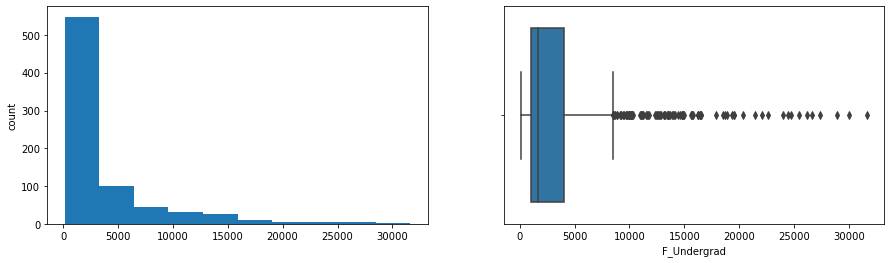

P_Undergrad
Skew : 5.69


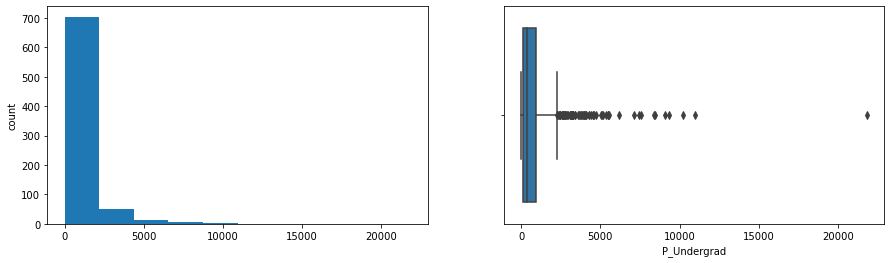

Outstate
Skew : 0.51


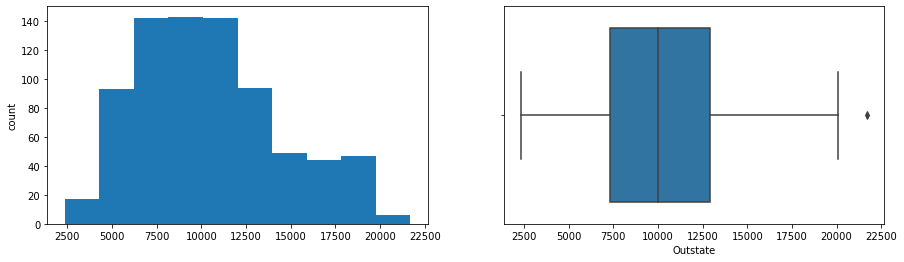

Room_Board
Skew : 0.48


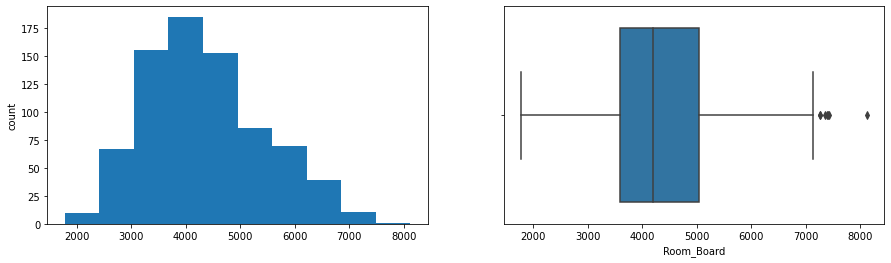

Books
Skew : 3.49


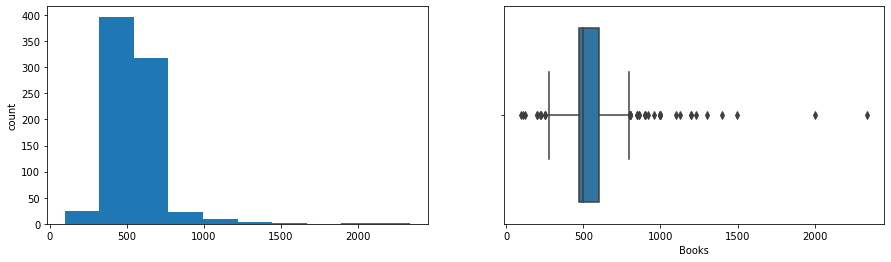

Personal
Skew : 1.74


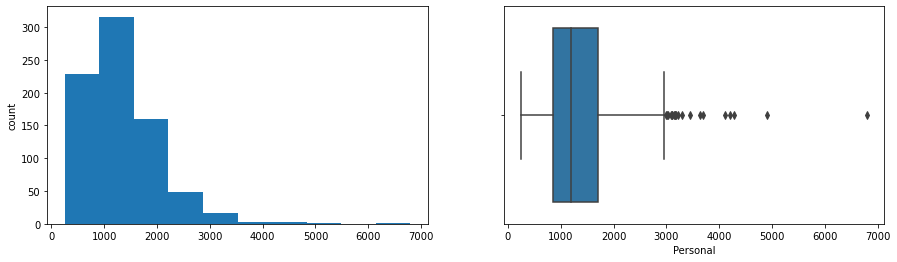

PhD
Skew : -0.77


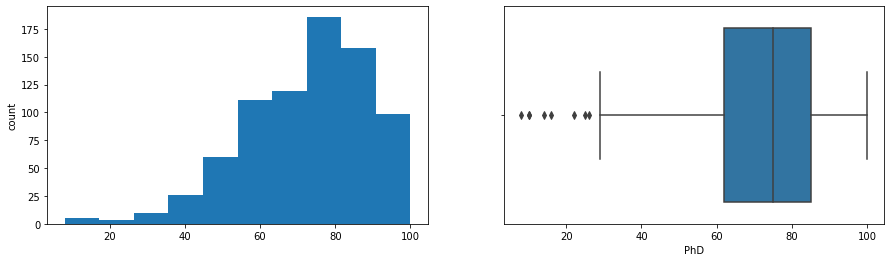

Terminal
Skew : -0.82


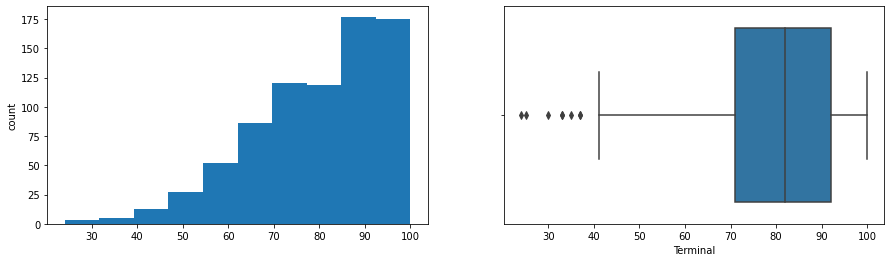

S_F_Ratio
Skew : 0.67


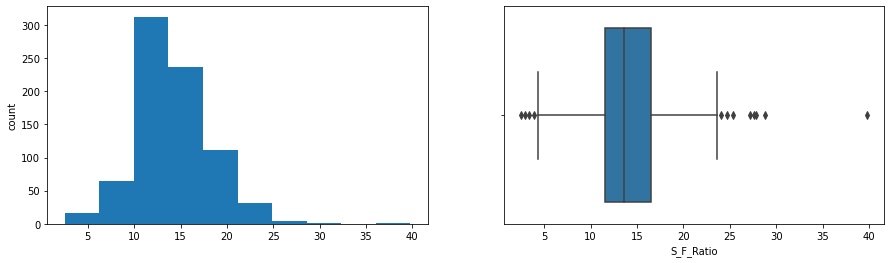

perc_alumni
Skew : 0.61


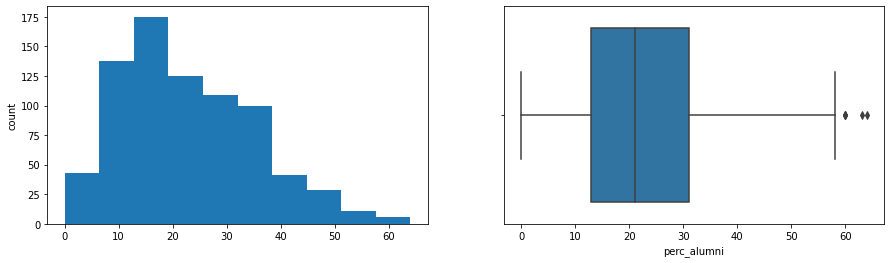

Expend
Skew : 3.46


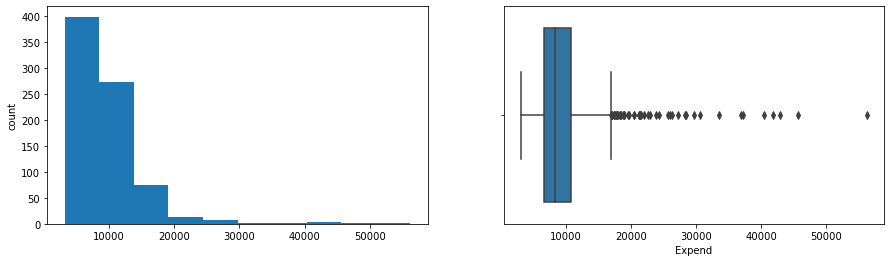

Grad_Rate
Skew : -0.14


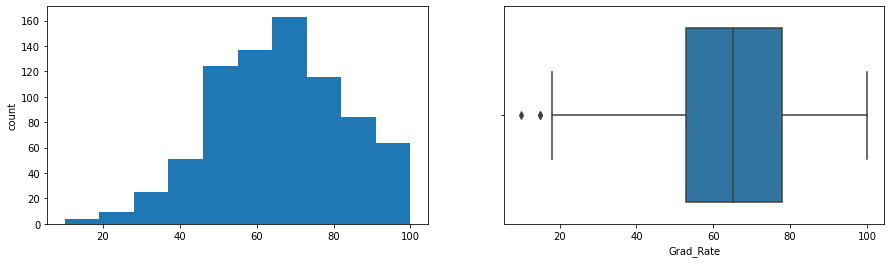

In [30]:
for column in data.columns:
    print(column)
    print('Skew :',round(data[column].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[column].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[column])
    plt.show()

#### What are the columns that have highly right skew? 
* Apps, Accept, Enroll, Top10perc, F_Undergrad, P_Undergrad, books, Personal, Expend
#### moderate right skew? 
* S_F_Ratio, Outstate, and perc_alumni.

#### What are the columns that have moderate left skew?
* PhD and Terminal

#### What is the column that does not possess outliers?
* Top25perc

**Now, let's check the correlation among different variables.**

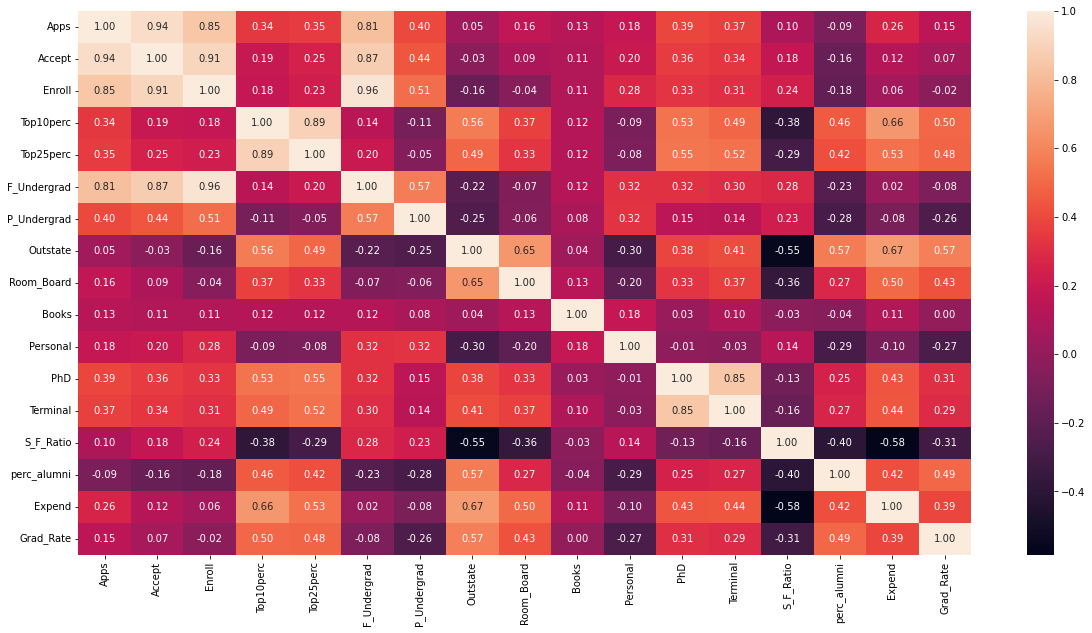

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

#### List the variables that has high positive correlation and high negative correlation.Suppose Threshold for positive correlation=0.8, Threshold for negative correlation = -0.5

high positive correlation

* 1- The variable Apps has strong positive correlation with Accept, Enroll, and F_Undergrad 
* 2- The variable Accept has strong positive correlation with Apps, Enroll, and F_Undergrad 
* 3- The variable Enroll has strong positive correlation with Apps, Accept, and F_Undergrad 
* 4- The variable F_Undergrad has strong positive correlation with Apps, Accept, and Enroll 
* 5- The variable Top10perc has strong positive correlation with Top25perc.
* 6- The variable Terminal has strong positive correlation with PhD.

high negative correlation
* The variable S_F_Ratio has strong negative correlation with Expand and outstate.

Note: 
* The light color represent high positive corr between varibles, while the dark color represent high negative corr. 


#### Scaling the data

In [32]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled_copy = data_scaled.copy()

#### Print head for data after scaling.

In [33]:
data_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F_Undergrad,P_Undergrad,Outstate,Room_Board,Books,Personal,PhD,Terminal,S_F_Ratio,perc_alumni,Expend,Grad_Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.162859,-0.115729,1.013776,-0.867574,-0.501910,-0.317993
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.676529,-3.378176,-0.477704,-0.544572,0.166110,-0.551805
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.205112,-0.931341,-0.300749,0.585935,-0.177290,-0.668710
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185939,1.175657,-1.615274,1.151188,1.792851,-0.376446
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204995,-0.523535,-0.553542,-1.675079,0.241803,-2.948375


## Principal Component Analysis

In [34]:
data.shape

(777, 17)

In [35]:
#Defining the number of principal components to generate 
number_Of_Principle_Component = data_scaled.shape[1]

#Finding principal components for the data
pca = PCA(n_components = number_Of_Principle_Component, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

#### Visualize the Explained Individual Components

Text(0, 0.5, 'Cumulative Explained Variance')

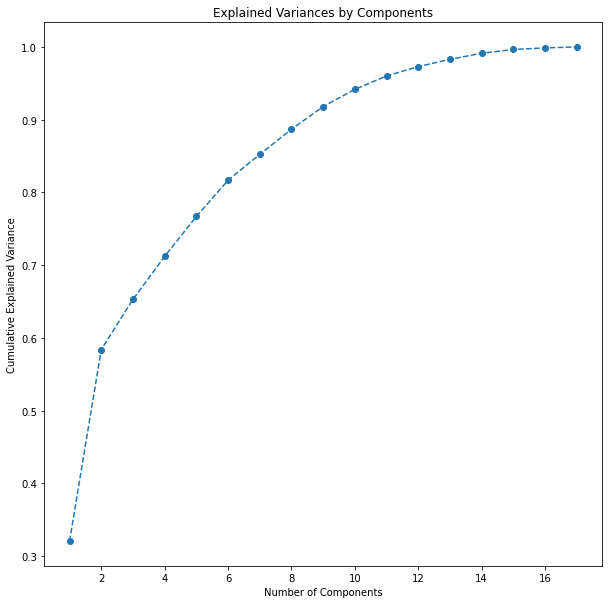

In [36]:
# visualize the explained variance by individual components
plt.figure(figsize = (10,10))
plt.plot(range(1,18), exp_var.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

#### Find the least number of components that can explain more than 70% variance

In [37]:
sum = 0
for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum > 0.70):
        print("Number of PCs that explain at least 70% variance: ", ix+1)
        break

Number of PCs that explain at least 70% variance:  4


#### Construct the 4 most important PCA components

In [38]:
np.round(pca.components_,2)

array([[ 0.25,  0.21,  0.18,  0.35,  0.34,  0.15,  0.03,  0.29,  0.25,
         0.06, -0.04,  0.32,  0.32, -0.18,  0.21,  0.32,  0.25],
       [ 0.33,  0.37,  0.4 , -0.08, -0.04,  0.42,  0.32, -0.25, -0.14,
         0.06,  0.22,  0.06,  0.05,  0.25, -0.25, -0.13, -0.17],
       [-0.06, -0.1 , -0.08,  0.03, -0.02, -0.06,  0.14,  0.05,  0.15,
         0.68,  0.5 , -0.13, -0.07, -0.29, -0.15,  0.23, -0.21],
       [ 0.28,  0.27,  0.16, -0.05, -0.11,  0.1 , -0.16,  0.13,  0.19,
         0.08, -0.24, -0.53, -0.52, -0.16,  0.02,  0.08,  0.26],
       [ 0.  ,  0.05, -0.06, -0.39, -0.43, -0.04,  0.3 ,  0.22,  0.56,
        -0.13, -0.22,  0.14,  0.21, -0.08, -0.22,  0.08, -0.11],
       [-0.01,  0.01, -0.04, -0.05,  0.03, -0.04, -0.19, -0.03,  0.16,
         0.64, -0.33,  0.09,  0.15,  0.49, -0.05, -0.3 ,  0.22],
       [-0.04, -0.01, -0.03, -0.16, -0.12, -0.02,  0.05,  0.11,  0.21,
        -0.15,  0.63, -0.  , -0.03,  0.22,  0.24, -0.23,  0.56],
       [-0.1 , -0.06,  0.06, -0.12, -0.1 ,  0.08

In [39]:
pc_comps = ['PC1','PC2','PC3', 'PC4']
data_pca = pd.DataFrame(np.round(pca.components_[:4,:],2),index=pc_comps,columns=data_scaled.columns)
data_pca.T

,PC1,PC2,PC3,PC4
Apps,0.25,0.33,-0.06,0.28
Accept,0.21,0.37,-0.10,0.27
Enroll,0.18,0.40,-0.08,0.16
Top10perc,0.35,-0.08,0.03,-0.05
Top25perc,0.34,-0.04,-0.02,-0.11
F_Undergrad,0.15,0.42,-0.06,0.10
P_Undergrad,0.03,0.32,0.14,-0.16
Outstate,0.29,-0.25,0.05,0.13
Room_Board,0.25,-0.14,0.15,0.19
Books,0.06,0.06,0.68,0.08


#### Color the values more than 0.25 with skyblue and values less than -0.25 with pink

In [40]:
def color_high(val):
    if val < -0.25:
        return 'background: pink'
    elif val > 0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4
Apps,0.250000,0.330000,-0.060000,0.280000
Accept,0.210000,0.370000,-0.100000,0.270000
Enroll,0.180000,0.400000,-0.080000,0.160000
Top10perc,0.350000,-0.080000,0.030000,-0.050000
Top25perc,0.340000,-0.040000,-0.020000,-0.110000
F_Undergrad,0.150000,0.420000,-0.060000,0.100000
P_Undergrad,0.030000,0.320000,0.140000,-0.160000
Outstate,0.290000,-0.250000,0.050000,0.130000
Room_Board,0.250000,-0.140000,0.150000,0.190000
Books,0.060000,0.060000,0.680000,0.080000
